# Work balance analysis of Google company's employees in California 

### Group H: Eugenio Baldo, Stefania Sferragatta, Clara Lecce

In [1]:
from script import *

In [2]:
google = pd.read_csv('google.csv')
del google['Unnamed: 0']

In [3]:
google.columns= ['company','location','job-title','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars','helpful_count','year']
google.head()

,company,location,job-title,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,year
0,google,"Mountain View, CA",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0,2094,2013.0
1,google,"New York, NY",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0,949,2014.0
2,google,"Mountain View, CA",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0,498,2015.0
3,google,"Los Angeles, CA",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0,49,2018.0
4,google,"Mountain View, CA",Former Employee - SDE2,5.0,4.0,4.0,4.0,5.0,4.0,1,2018.0


In [4]:
fields = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
summary_google = google[fields].describe().transpose()
summary_google

,count,mean,std,min,25%,50%,75%,max
overall_ratings,4158.0,4.301347,0.964291,1.0,4.0,5.0,5.0,5.0
work_balance_stars,4158.0,3.981481,1.085427,1.0,3.0,4.0,5.0,5.0
culture_values_stars,4158.0,4.346320,0.903219,1.0,4.0,4.4,5.0,5.0
carrer_opportunities_stars,4158.0,3.910053,1.100862,1.0,3.0,4.0,5.0,5.0
comp_benefit_stars,4158.0,4.346441,0.864712,1.0,4.0,5.0,5.0,5.0
senior_mangemnet_stars,4158.0,3.817220,1.103779,1.0,3.0,4.0,5.0,5.0


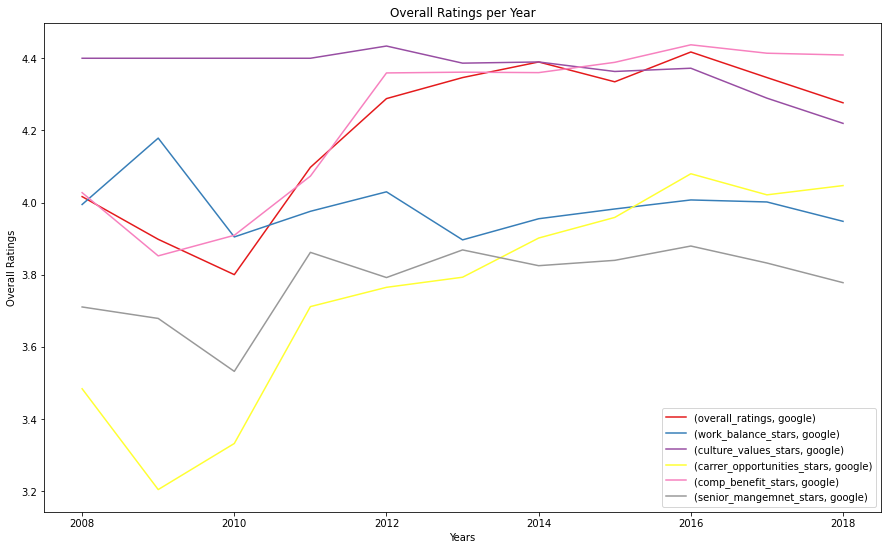

In [5]:
#Ratings over time for Google
fig, ax = plt.subplots(figsize=(15,9))
keys = ['year','company']
lines = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
google.groupby(keys)[lines].mean().unstack().plot(ax=ax,colormap = 'Set1')
_ = plt.xlabel("Years")
_ = plt.ylabel("Overall Ratings")
_ = plt.title("Overall Ratings per Year")
_ = plt.legend()

In [6]:
corr_matrix(google)

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,Job_code,Locations_code
overall_ratings,1.000000,0.521767,0.616378,0.641013,0.482167,0.647143,-0.039539,-0.091972,0.021757
work_balance_stars,0.521767,1.000000,0.497289,0.410909,0.371769,0.518078,-0.049102,-0.025373,0.038134
culture_values_stars,0.616378,0.497289,1.000000,0.489991,0.411630,0.605130,-0.045568,-0.066048,0.023403
carrer_opportunities_stars,0.641013,0.410909,0.489991,1.000000,0.477543,0.591095,-0.034615,-0.039131,0.057142
comp_benefit_stars,0.482167,0.371769,0.411630,0.477543,1.000000,0.453748,-0.002096,0.007238,0.049757
senior_mangemnet_stars,0.647143,0.518078,0.605130,0.591095,0.453748,1.000000,-0.033371,-0.058699,0.038521
helpful_count,-0.039539,-0.049102,-0.045568,-0.034615,-0.002096,-0.033371,1.000000,0.018694,0.003037
Job_code,-0.091972,-0.025373,-0.066048,-0.039131,0.007238,-0.058699,0.018694,1.000000,0.050036
Locations_code,0.021757,0.038134,0.023403,0.057142,0.049757,0.038521,0.003037,0.050036,1.000000


#### Probabilistic and graphical models

In [19]:
df_train_gg = get_train_df(google)
df_train_gg.head()

,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars
1702,5,4,5,5,4
67,5,5,5,5,5
3593,4,3,3,4,3
2445,3,4,4,5,4
2154,5,5,5,5,5




Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 3/3 [01:01<00:00, 20.66s/it]


  0%|                                                                            | 7/1000000 [00:00<9:27:02, 29.39it/s]



[('culture_values_stars', 'senior_mangemnet_stars'), ('culture_values_stars', 'work_balance_stars'), ('culture_values_stars', 'carrer_opportunities_stars'), ('culture_values_stars', 'comp_benefit_stars'), ('carrer_opportunities_stars', 'comp_benefit_stars'), ('senior_mangemnet_stars', 'carrer_opportunities_stars'), ('senior_mangemnet_stars', 'work_balance_stars')]


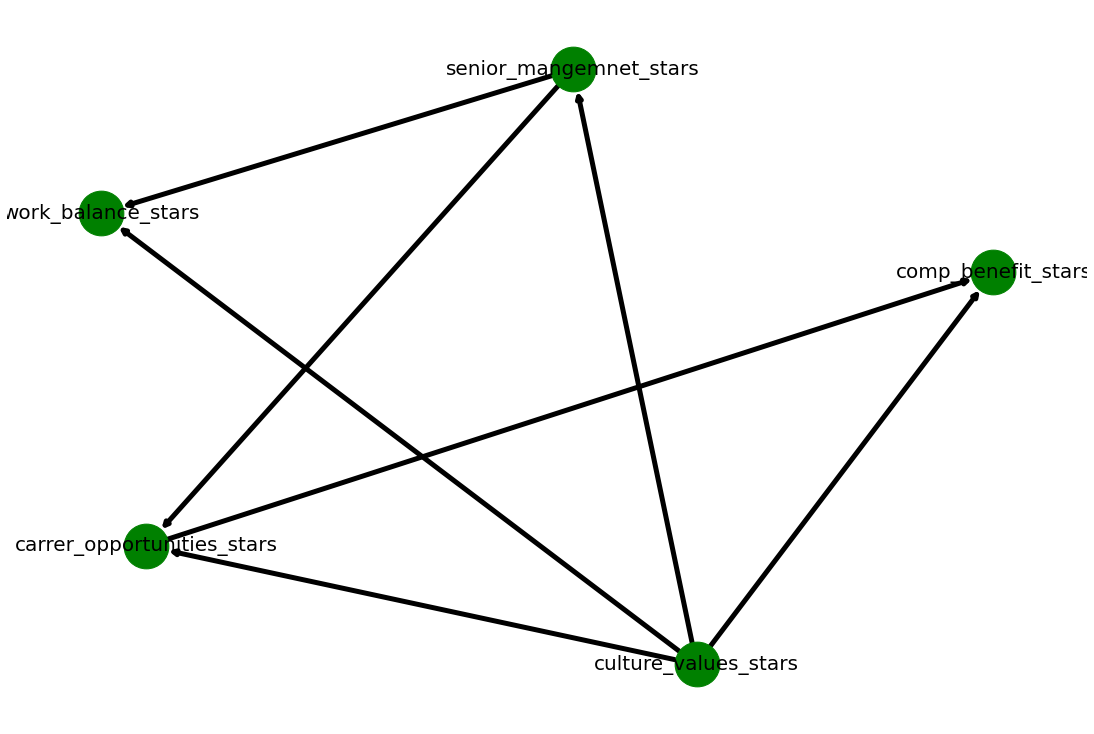

In [20]:
hc = HillClimbSearch(df_train_gg, scoring_method=K2Score(df_train_gg))  #use the training set to build the model
#The score to be optimized during structure estimation.  
#  Supported structure scores: k2score, bdeuscore, bicscore.
best_model = hc.estimate()
print(best_model)
edges = list(best_model.edges())
print(edges)
model = BayesianModel(edges)

%matplotlib inline
plt.figure(figsize=(15,10))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000,
        node_color="green", width = 5, font_size = 20)
plt.show()

In [21]:
model.fit(df_train_gg, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [28]:
#focus on the relation between senior management and work_balance
print(infer.query(variables=['work_balance_stars', 'senior_mangemnet_stars'], joint= True))



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]


Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]


Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 203.04it/s]

+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars    | senior_mangemnet_stars    |   phi(work_balance_stars,senior_mangemnet_stars) |
+=======================+===========================+==================================================+
| work_balance_stars(1) | senior_mangemnet_stars(1) |                                           0.0200 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(2) |                                           0.0080 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(3) |                                           0.0048 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(4) |  

In [29]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]



Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]



Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.52it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3846 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2154 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1692 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0923 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.1385 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.1087 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [30]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))





  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]




Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]




Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]




Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 321.59it/s]





  0%|                                                                                            | 0/3 [00:00<?, ?it/s]




Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]





  0

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3846 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2154 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1692 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0923 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.1385 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.1087 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]

Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 259.76it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0000 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0158 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.0976 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.1847 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.7018 |
+-----------------------+---------------------------+


In [31]:
causal_graph_google = """
digraph {
work_balance_stars;
carrer_opportunities_stars;
comp_benefit_stars;
senior_mangemnet_stars;

culture_values_stars -> senior_mangemnet_stars;
senior_mangemnet_stars -> work_balance_stars;
senior_mangemnet_stars -> carrer_opportunities_stars
culture_values_stars -> comp_benefit_stars;
carrer_opportunities_stars -> comp_benefit_stars; 
culture_values_stars -> work_balance_stars
}
"""

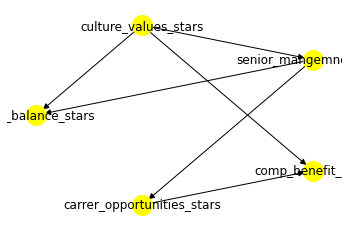

In [36]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='senior_mangemnet_stars'

model_gg= CausalModel(
        data = df_train_gg,
        graph=causal_graph_google.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_gg.view_model()
#display(Image(filename='causal_model.png'))

In [37]:
estimands = model_gg.identify_effect()

In [38]:
estimate = model_gg.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
─────────────────────────(Expectation(work_balance_stars|culture_values_stars)
d[senior_mangemnet_stars]                                                     

 
)
 
Estimand assumption 1, Unconfoundedness: If U→{senior_mangemnet_stars} and U→work_balance_stars then P(work_balance_stars|senior_mangemnet_stars,culture_values_stars,U) = P(work_balance_stars|senior_mangemnet_stars,culture_values_stars)

## Realized estimand
b: work_balance_stars~senior_mangemnet_stars+culture_values_stars
Target units: ate

## Estimate
Mean value: 0.32639438154883305
p-value: [1.1502112e-30]
95.0% confidence interval: [[0.27225435 0.38053441]]



In [42]:
# methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
# for mode in methods:
#     refutel(mode)

In [41]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel = model_gg.refute_estimate(estimands,estimate, mode)
    print(refutel)

Refute: Add a Random Common Cause
Estimated effect:0.32639438154883305
New effect:0.3260245601072551

Refute: Use a subset of data
Estimated effect:0.32639438154883305
New effect:0.3303145370857766
p value:0.37

Refute: Use a Placebo Treatment
Estimated effect:0.32639438154883305
New effect:0.003981908897383035
p value:0.45

